In [1]:
import cv2
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

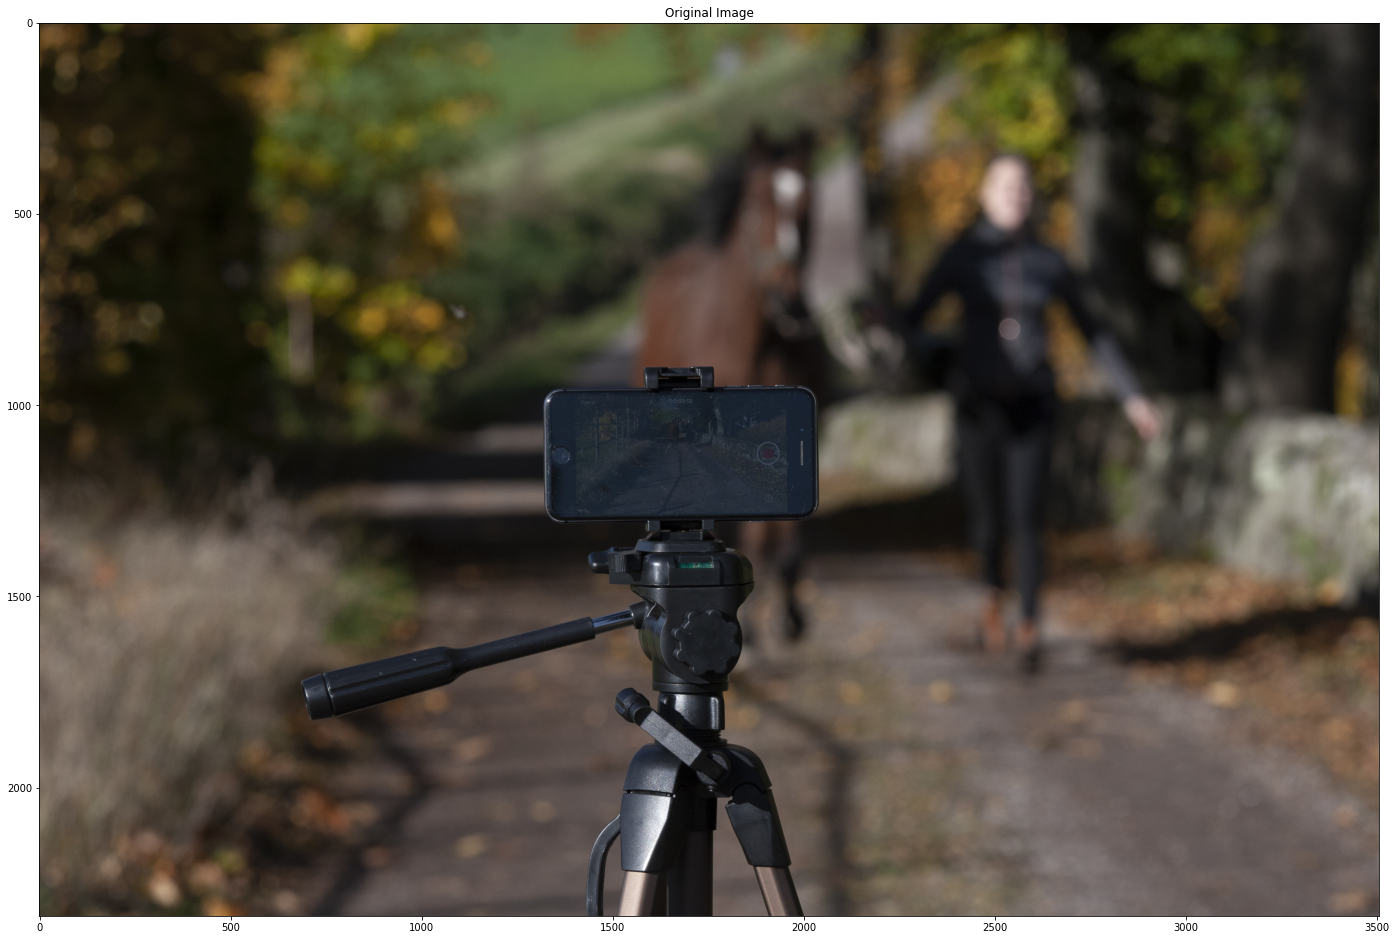

In [2]:
img = cv2.imread("/Users/sleipdev/Github Repos/ImageBright/images/Blåtröjabredd.jpg")
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(24,32))
plt.title("Original Image")
plt.imshow(original_img)
plt.show()


In [3]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")
   return cv2.LUT(image, table)

In [4]:
print(original_img.shape)

(2336, 3504, 3)


In [132]:
def mod_adjust_gamma(image, gamma=1.0, row_mod_min=0, row_mod_max=0, col_mod_min=0, col_mod_max=0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")
   
   modified_img = np.array(image, copy=True)
   kernel = np.array([[0, -1, 0],
                     [-1, 5,-1],
                     [0, -1, 0]])
   modify_range_row = np.array(range(row_mod_min,row_mod_max))
   modify_range_col = np.array(range(col_mod_min,col_mod_max))
   # for row in range(original_img.shape[0]):
   #  for col in range(original_img.shape[1]):
   #      for rgb in range(original_img[row,col].size):
   #         if row in modify_range_row and col in modify_range_col:
   #            modified_img[row,col,rgb] = table[original_img[row,col,rgb]]
   # return modified_img
   modified_img[row_mod_min:row_mod_max, col_mod_min:col_mod_max] = cv2.LUT(modified_img[row_mod_min:row_mod_max, col_mod_min:col_mod_max], table) # brightness
   modified_img[row_mod_min:row_mod_max, col_mod_min:col_mod_max] = cv2.filter2D(src=modified_img[row_mod_min:row_mod_max, col_mod_min:col_mod_max], ddepth=-1, kernel=kernel) # sharpness
   return modified_img

In [143]:
adjusted_man = mod_adjust_gamma(original_img, gamma=1.3, row_mod_min=960, row_mod_max=1290, col_mod_min=1400, col_mod_max=1960)

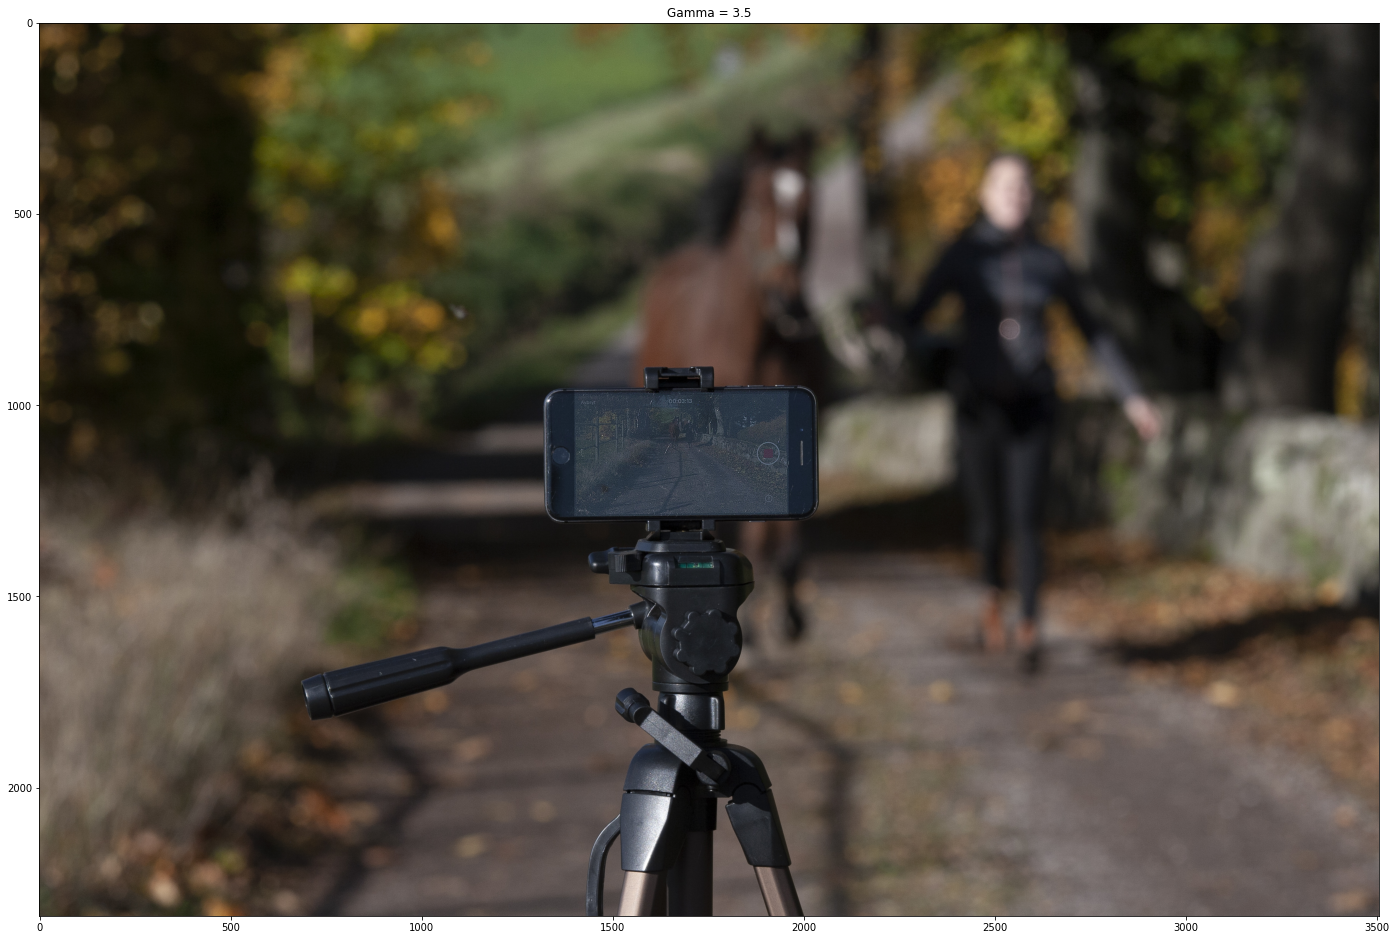

In [144]:
plt.figure(figsize=(24,32))
plt.title("Gamma = 1.3")
plt.imshow(adjusted_man)
plt.show()

In [6]:
adjusted = adjust_gamma(original_img, gamma=3.5)

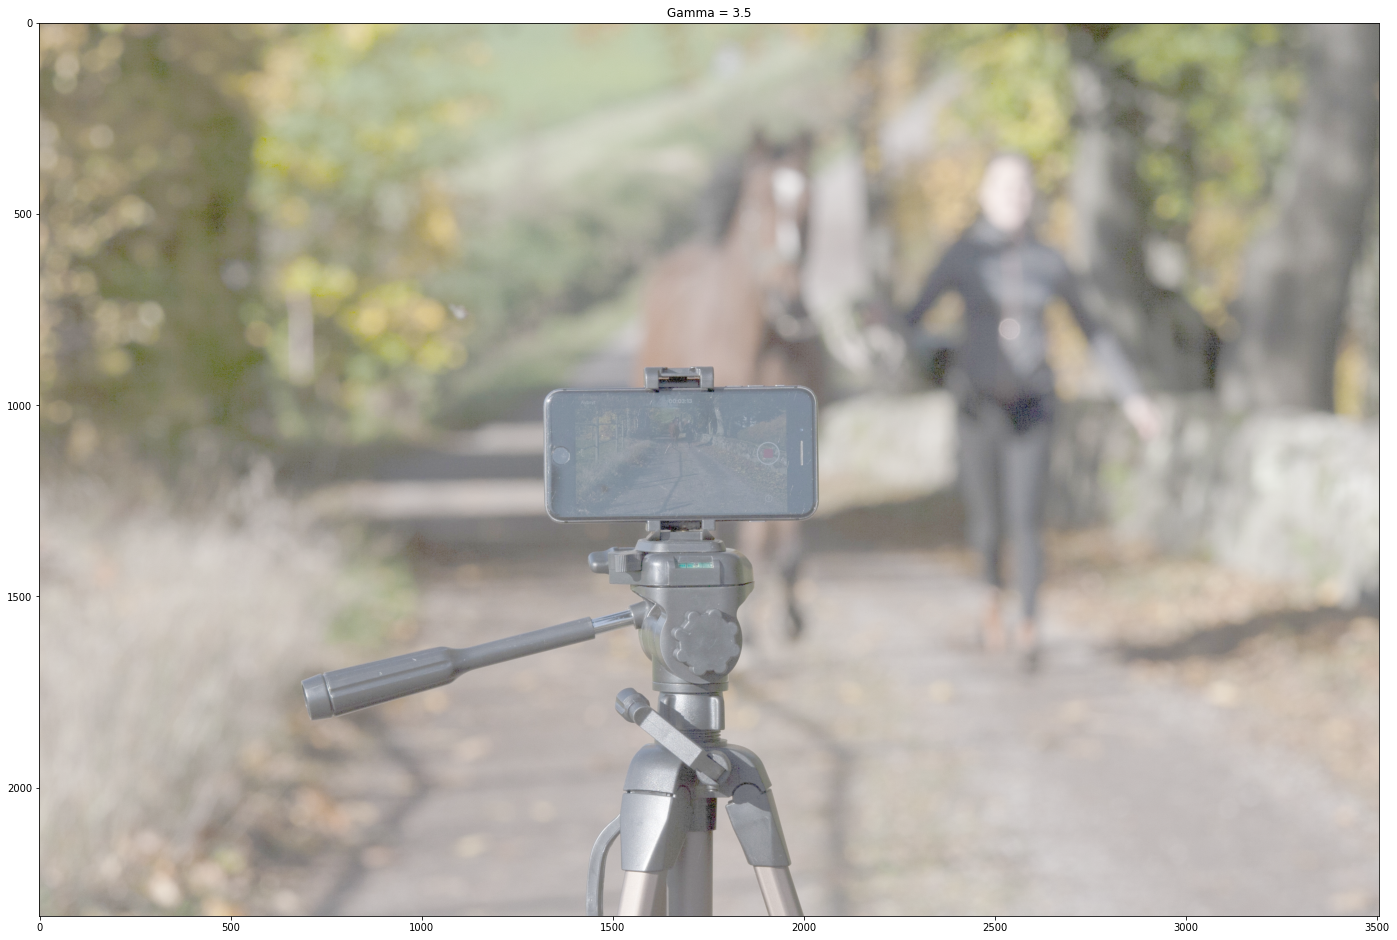

In [7]:
plt.figure(figsize=(24,32))
plt.title("Gamma = 3.5")
plt.imshow(adjusted)
plt.show()